In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from os.path import isfile

In [2]:
import cv2
from IPython.display import display, Image

def display_cv_image(image, format='.jpg'):
    decoded_bytes = cv2.imencode(format, image)[1].tobytes()
    display(Image(data=decoded_bytes))


In [3]:
img_dir = '../input/humpback-whale-identification/train/'
target = 'ad70af04e.jpg'
same_label = '5ff37ee82.jpg'
difference_label = '96b83ed11.jpg'

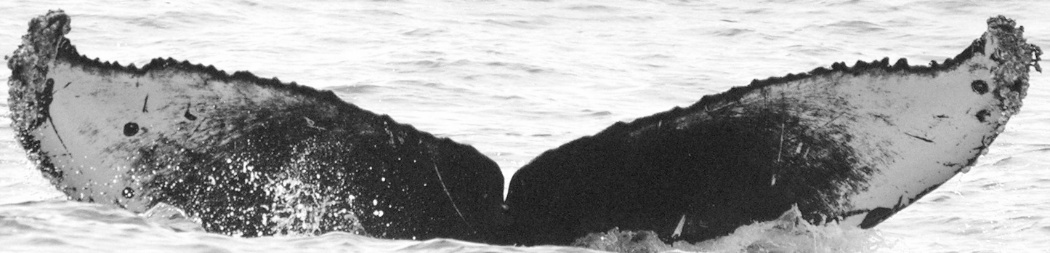

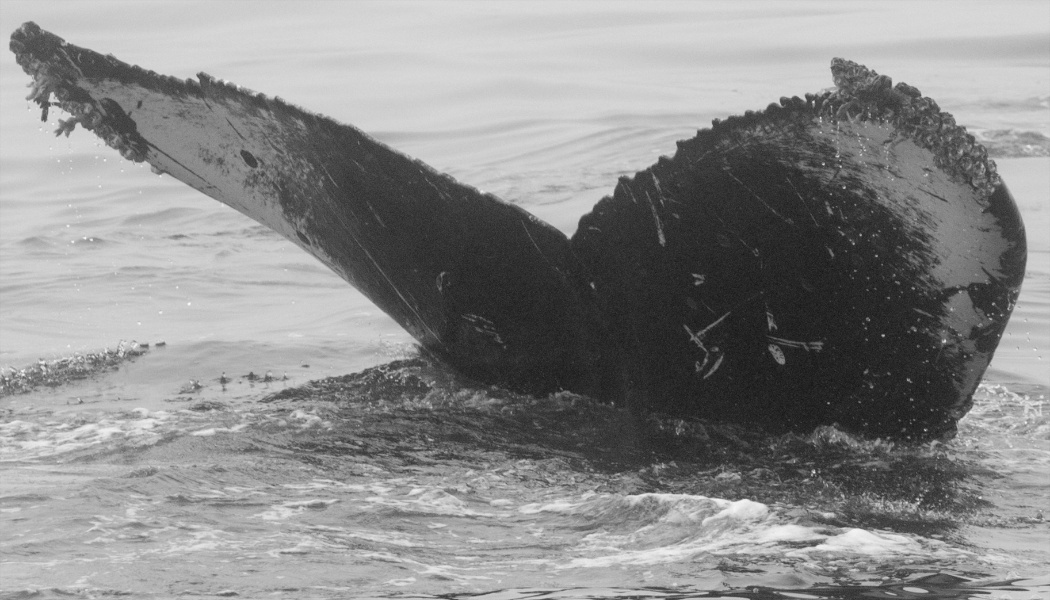

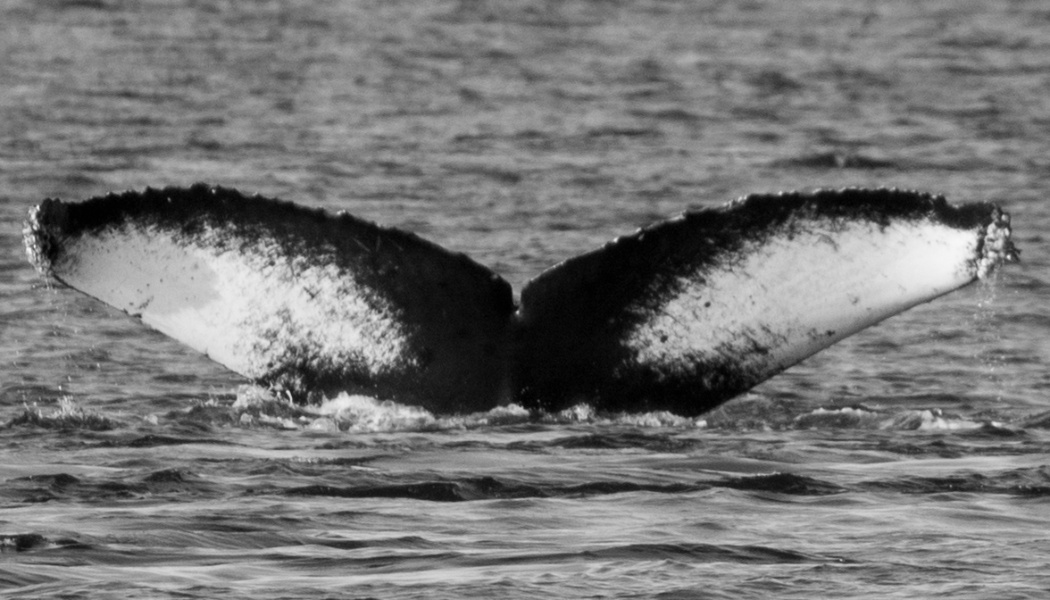

In [4]:
img_dir = '../input/humpback-whale-identification/train/'
img_size = 128

target_img = cv2.imread(img_dir + target, 0)#, cv2.IMREAD_GRAYSCALE)
display_cv_image(target_img)

same_label_img = cv2.imread(img_dir + same_label, 0)#, cv2.IMREAD_GRAYSCALE)
display_cv_image(same_label_img)

difference_label_img = cv2.imread(img_dir + difference_label, 0)#, cv2.IMREAD_GRAYSCALE)
display_cv_image(difference_label_img)


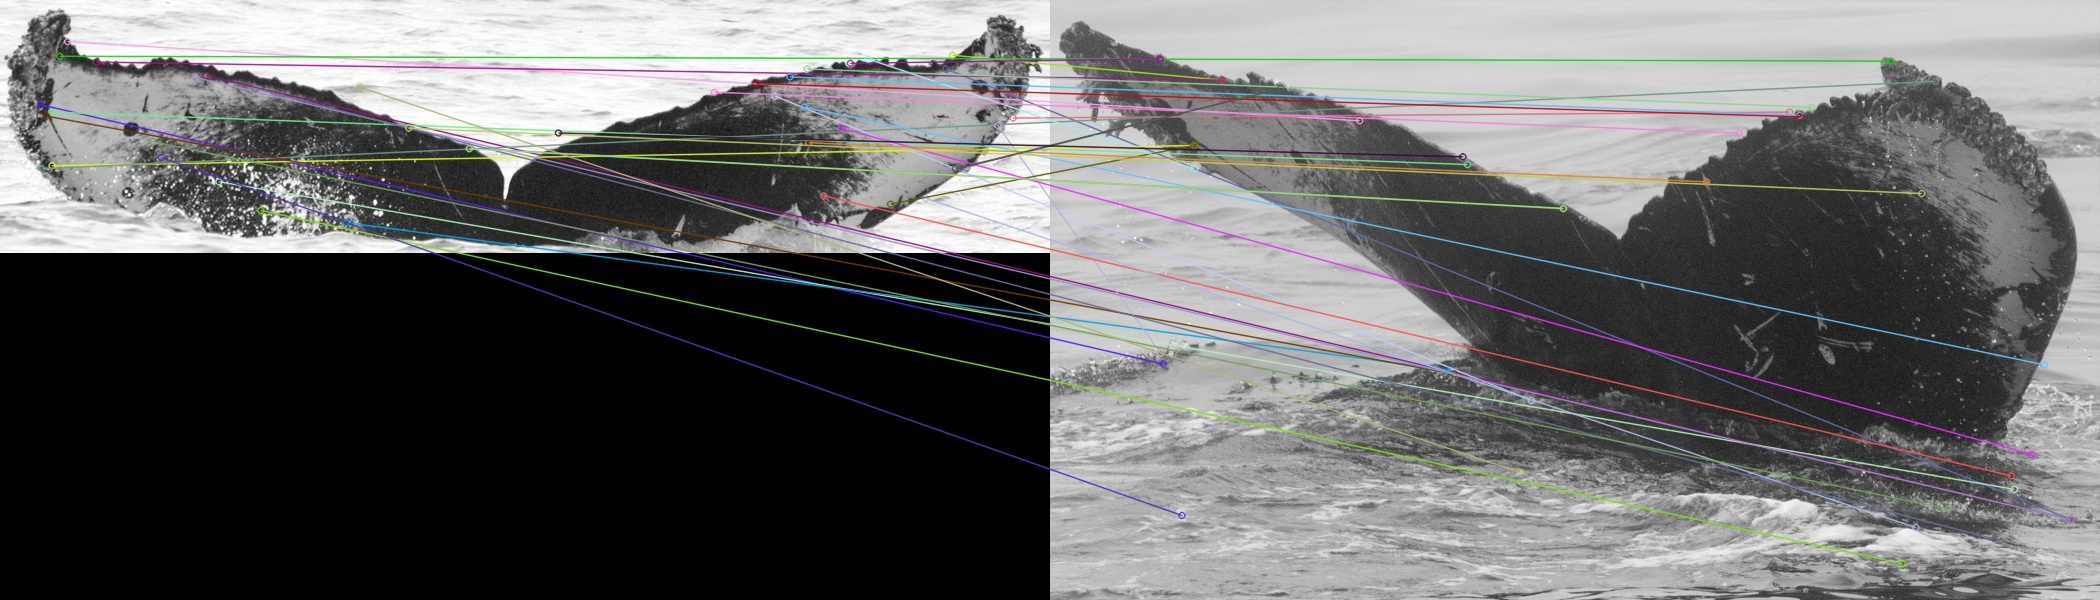

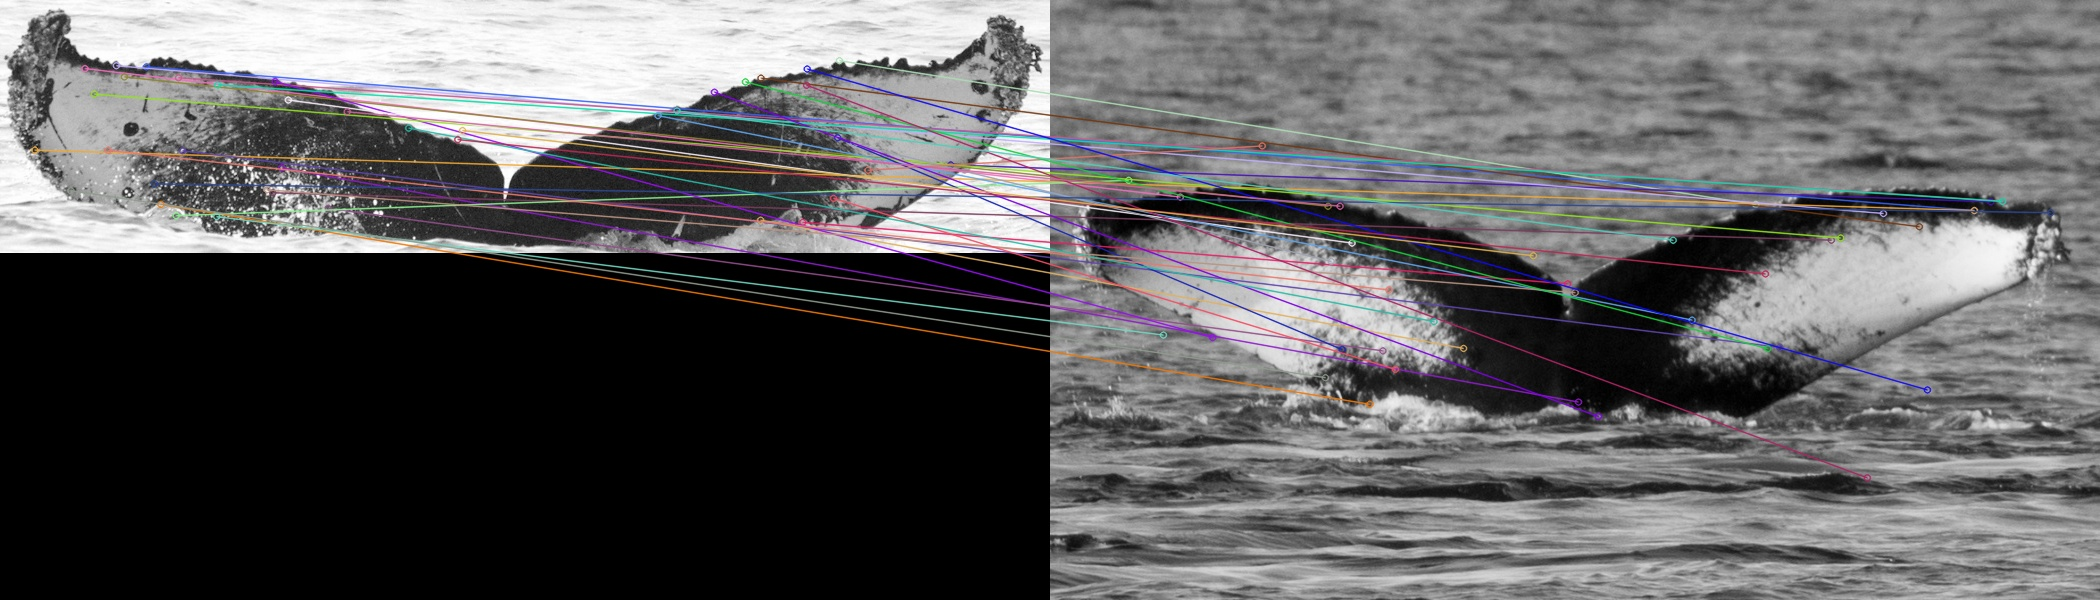

In [5]:
#特徴抽出機の生成
# detector = cv2.xfeatures2d.SIFT_create()
detector = cv2.AKAZE_create() 
#kpは特徴的な点の位置 destは特徴を現すベクトル
kp1, des1 = detector.detectAndCompute(target_img, None)
kp2, des2 = detector.detectAndCompute(same_label_img, None)
kp_difference, des_difference = detector.detectAndCompute(difference_label_img, None)
#特徴点の比較機
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
#割合試験を適用
good = []
match_param = 0.85
for m,n in matches:
    if m.distance < match_param*n.distance:
        good.append([m])
#cv2.drawMatchesKnnは適合している点を結ぶ画像を生成する
match_same_label = cv2.drawMatchesKnn(target_img,kp1,same_label_img,kp2,good, None,flags=2)
display_cv_image(match_same_label)

good_difference = []
matches_difference = bf.knnMatch(des1,des_difference, k=2)
for m,n in matches_difference:
    if m.distance < match_param*n.distance:
        good_difference.append([m])
match_defference_label = cv2.drawMatchesKnn(target_img,kp1,difference_label_img, 
                                            kp_difference,good_difference, None,flags=2
                                           )
display_cv_image(match_defference_label)